<a href="https://colab.research.google.com/github/morphingdesign/houdiniPython/blob/master/C_to_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Import dependencies and TF
*   Import NumPy for data lists

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np

Setup data for training
*   **Feature**: model inputs (C in this ex)
*   **Labels**: model outputs (F in this ex)
*   **Example**: pair of I/O (C & F values at a specific index)



In [3]:
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype = float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype = float)

for i, c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


Create model

* Build layer

  * Build layer by instantiating `tf.keras.layers.Dense`

    * Configuration:

      * `input_shape=[1]` : Specifies that input to this layer is a single value. 1D array of a single float representing C
      * `units=1`: Specifies number of neurons in layer. Num of neurons defines how many internal var the layer has to try to learn to solve the problem. Since this is the final layer, it is also the size of the model output, a single float representing F. (In a multi-layer network, size/shape of layer would need to match the `input_shape` of the next layer).
    
* Assemble layers:
 
   * Use Sequential model definition, which takes a list of layers as arg, specifying calculation order from input to output
    
   

In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

Compile model

When compiled, model is given:

* Loss function: Measure of difference between predictions and desired outcome
* Optimizer function: Used to adjust internal values to reduce loss

Implementation in training process:

* Used within `model.fit()` to calculate loss @each pt, then improve it
* Optimizer func adjusts model internal variables until it mirros the actual equation it is looking for
* TF uses numerical analysis for this tuning process
* The loss function (mean_squared_Error) and optimizer (Adam) used in this ex are standard, but others are also available

Learning rate
* 0.1 used in this ex
* This is step size taken when adjusting model values
* Too small -> too many iterations to train model
* Too large -> degraded accuracy
* Good range: 0.001 (default) - 0.1

In [0]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

Train model

Call the `fit()` method
Model takes C values and calculates them using current internal values (called 'weights') and outputs values meant to be F equivalent values
Initial weights are random, so output will be far off
Difference between actual outpu and desired output is calculated using loss function
Optimizer function uses loss to direct how weights are adjusted for next iteration
Iterative cycles are controlled by `fit()` method. 

Args for `fit(inputs, desired outputs, epochs, verbose)`

* Epochs: Specifies num of times cycle is run
* Verbose: Controls amount of output

In [7]:
history = model.fit(celsius_q, fahrenheit_a, epochs = 500, verbose = False)
print("Finished training model")

Finished training model


Model training statistics

* The fit() method returns a history object that can be plotted

* Plot shows how loss decreases as epochs increase

* A high loss means that the F predicted by model is far from corresponding value in F

* Matplotlib used for plot

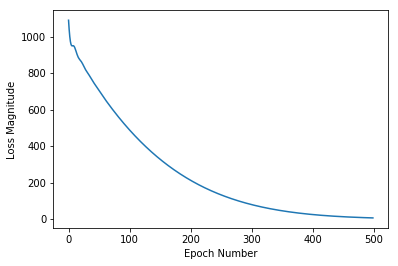

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

Predict new values

With the model trained, use the `predict()` method to test new values of C into F

In [10]:
print(model.predict([100.0]))

[[211.33815]]


Recap

* Model created with a dense layer
* Model trained with 3,500 examples
  * 7 pairs
  * Over 500 epochs